In [ ]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('hw3.ok')

# Homework 3: Trump, Twitter, and Text

## Due Date: Monday 2/25, 11:59 pm PST

Welcome to the third homework assignment of Data 100/200! In this assignment, we will work with Twitter data in order to analyze Donald Trump's tweets.

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** below.

**Collaborators**: *list collaborators here*

In [2]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

### Score Breakdown

Question | Points
--- | ---
Question 1 | 2
Question 2 | 1
Question 3 | 2
Question 4a | 1
Question 4b | 2
Question 4c | 2
Question 5a | 1
Question 5b | 1
Question 5c | 1
Question 5d | 2
Question 5e | 2
Question 6a | 1
Question 6b | 1
Total | 19

---
# Part 1: Importing the Data

We will again use the `fetch_and_cache` utility to download the dataset. 

In [3]:
# Download the dataset
from ds100_utils import fetch_and_cache
data_url = 'http://www.ds100.org/sp19/assets/datasets/hw3-realdonaldtrump_tweets.json.zip'
file_name = 'hw3-realdonaldtrump_tweets.json.zip'

dest_path = fetch_and_cache(data_url=data_url, file=file_name)
print(f'Located at {dest_path}')

Using version already downloaded: Fri Jun 14 12:58:35 2019
MD5 hash of file: f26e90f51b3d7b304d8db1ad5bee2f57
Located at data/hw3-realdonaldtrump_tweets.json.zip


Now that we've downloaded the tweets, let's unzip them and load them into our notebook. Run the cell below to unzip and read tweets from the json file into a list named `all_tweets`.

In [4]:
# Unzip the dataset
my_zip = zipfile.ZipFile(dest_path, 'r')
with my_zip.open('hw3-realdonaldtrump_tweets.json', 'r') as f:
    all_tweets = json.load(f)

Here is what a typical tweet from `all_tweets` looks like:

In [5]:
from pprint import pprint # to get a more easily-readable view.
pprint(all_tweets[-1])

{'contributors': None,
 'coordinates': None,
 'created_at': 'Tue Oct 16 18:40:18 +0000 2018',
 'display_text_range': [0, 174],
 'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
 'favorite_count': 52115,
 'favorited': False,
 'full_text': 'Just spoke with the Crown Prince of Saudi Arabia who totally '
              'denied any knowledge of what took place in their Turkish '
              'Consulate. He was with Secretary of State Mike Pompeo...',
 'geo': None,
 'id': 1052268011900555265,
 'id_str': '1052268011900555265',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'place': None,
 'retweet_count': 13493,
 'retweeted': False,
 'source': '<a href="http://twitter.com/download/iphone" '
           'rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'user': {'contributors_enabled': False,
  

## Question 0

There are many ways we could choose to read the President’s tweets. Why might someone be interested in doing data analysis on the President’s tweets? Name one person or entity which might be interested in this kind of analysis. Then, give two reasons why a data analysis of the President's tweets might be interesting or useful for them. Answer in 2-3 sentences.

Solution:

+1 Point for the following:

Any response which identifies a person or entity, and then gives two reasons. Answers should be within 2-3 sentences, but no credit taken away for longer responses.

Example responses:

A news reporter could be interested in looking at Trump’s tweets this way. They might be interested in his general word choice, or even the sentiment on his tweets to further an argument.

An NGO could be interested in reading Trump’s tweets this way. They might select tweets by certain topics, and run analysis on those, or want to get a general sense of Trump’s opinions on given topics.


## Question 1

Construct a DataFrame called `trump` containing data from all the tweets stored in `all_tweets`. The index of the DataFrame should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 

Finally, **the resulting DataFrame should be sorted by the index.**

**Warning:** *Some tweets will store the text in the `text` field and other will use the `full_text` field.*

<!--
BEGIN QUESTION
name: q1
points: 2
-->

In [6]:
trump = ...
# BEGIN SOLUTION NO PROMPT
trump = pd.DataFrame({
    'time': pd.to_datetime([tweet['created_at'] for tweet in all_tweets]),
    'source': [tweet['source'] for tweet in all_tweets],
    'text': [tweet['text'] if "text" in tweet else tweet['full_text'] for tweet in all_tweets],
    'retweet_count': [tweet["retweet_count"] for tweet in all_tweets],
}, index=[tweet['id'] for tweet in all_tweets],
   columns=['time', 'source', 'text', 'retweet_count'],
).sort_index()
trump.head()
# END SOLUTION

,time,source,text,retweet_count
690171032150237184,2016-01-21 13:56:11+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","""@bigop1: @realDonaldTrump @SarahPalinUSA https://t.co/3kYQGqeVyD""",1059
690171403388104704,2016-01-21 13:57:39+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","""@AmericanAsPie: @glennbeck @SarahPalinUSA Remember when Glenn gave out gifts to ILLEGAL ALIENS at crossing the border? Me too!""",1339
690173226341691392,2016-01-21 14:04:54+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",So sad that @CNN and many others refused to show the massive crowd at the arena yesterday in Oklahoma. Dishonest reporting!,2006
690176882055114758,2016-01-21 14:19:26+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","Sad sack @JebBush has just done another ad on me, with special interest money, saying I won't beat Hillary - I WILL. But he can't beat me.",2266
690180284189310976,2016-01-21 14:32:57+00:00,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",Low energy candidate @JebBush has wasted $80 million on his failed presidential campaign. Millions spent on me. He should go home and relax!,2886


In [7]:
ok.grade("q1");

NameError: name 'ok' is not defined

---
# Part 2: Tweet Source Analysis

In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [8]:
trump['source'].unique()

array(['<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://mobile.twitter.com" rel="nofollow">Mobile Web (M5)</a>',
       '<a href="http://instagram.com" rel="nofollow">Instagram</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="https://periscope.tv" rel="nofollow">Periscope</a>',
       '<a href="https://ads.twitter.com" rel="nofollow">Twitter Ads</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Twitter Media Studio</a>'],
      dtype=object)

## Question 2

Notice how sources like "Twitter for Android" or "Instagram" are surrounded by HTML tags. In the cell below, clean up the `source` field by removing the HTML tags from each `source` entry.

**Hints:** 
* Use `trump['source'].str.replace` along with a regular expression.
* You may find it helpful to experiment with regular expressions at [regex101.com](https://regex101.com/).

<!--
BEGIN QUESTION
name: q2
points: 1
-->

In [9]:
## Uncomment and complete
# trump['source'] = ...
# BEGIN SOLUTION NO PROMPT
trump['source'] = trump['source'].str.replace(r"<[^>]*>", "")
# END SOLUTION

In [10]:
ok.grade("q2");

NameError: name 'ok' is not defined

In the following plot, we see that there are two device types that are more commonly used than others.

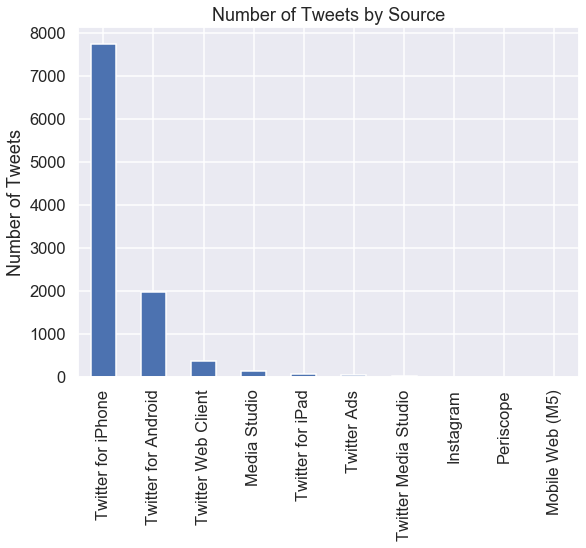

In [11]:
plt.figure(figsize=(8, 6))
trump['source'].value_counts().plot(kind="bar")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets by Source");

## Question 3

Now that we have cleaned up the `source` field, let's now look at which device Trump has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [12]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

trump['year'] = trump['time'].apply(year_fraction)

Now, use `sns.distplot` to overlay the distributions of Trump's 2 most frequently used web technologies over the years. Your final plot should look like:

<img src="images/source_years_q3.png" width="600px" />

<!--
BEGIN QUESTION
name: q3
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

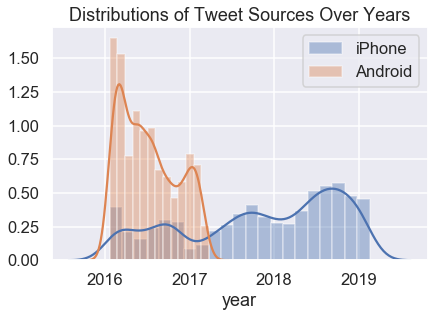

In [13]:
# BEGIN SOLUTION
top_devices = trump['source'].value_counts().head(2).index
for device in top_devices:
    sns.distplot(trump[trump['source'] == device]['year'], label = device[12:])
plt.title('Distributions of Tweet Sources Over Years')
plt.legend();
# plt.savefig("images/source_years_q3.png", bbox_inches='tight', dpi=300)
# END SOLUTION

## Question 4


Is there a difference between Trump's tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android device come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets).

In [14]:
for tweet in all_tweets[:3]:
    print(tweet['created_at'])

Wed Oct 12 14:00:48 +0000 2016
Wed Oct 12 13:46:43 +0000 2016
Wed Oct 12 12:59:05 +0000 2016


We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [15]:
trump['est_time'] = (
    trump['time'].dt.tz_localize("UTC") # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
trump.head()

TypeError: Already tz-aware, use tz_convert to convert.

### Question 4a

Add a column called `hour` to the `trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$

* **Hint:** See the cell above for an example of working with [dt accessors](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-dt-accessors).

<!--
BEGIN QUESTION
name: q4a
points: 1
-->

In [16]:
trump['hour'] = ...
# BEGIN SOLUTION NO PROMPT
trump['hour'] = (
    trump['est_time'].dt.hour + trump['est_time'].dt.minute/60 + 
    trump['est_time'].dt.second/(60*60)
)
# END SOLUTION

KeyError: 'est_time'

In [17]:
ok.grade("q4a");

NameError: name 'ok' is not defined

### Question 4b

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look similar to the following:

<img src="images/device_hour4b.png" width="600px" />

<!--
BEGIN QUESTION
name: q4b
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

TypeError: unsupported operand type(s) for +: 'ellipsis' and 'ellipsis'

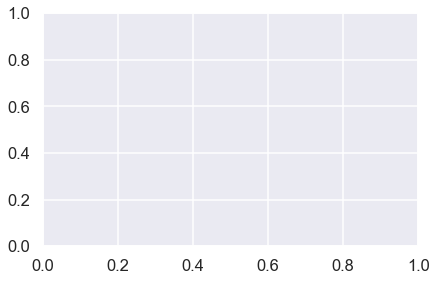

In [18]:
### make your plot here
# BEGIN SOLUTION
top_devices = trump['source'].value_counts().head(2).index
for device in top_devices:
    sns.distplot(trump[trump['source'] == device]['hour'], label = device[12:], hist=False)
plt.title('Distribution of Tweet Hours for Different Tweet Sources')
plt.xlabel('hour')
plt.ylabel('fraction')
plt.legend();
# plt.savefig('images/device_hour4b.png', bbox_inches='tight', dpi=300)
# END SOLUTION

### Question 4c

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Let's see if this information significantly changes our plot. Create a figure similar to your figure from question 4b, but this time, only use tweets that were tweeted before 2017. Your plot should look similar to the following:

<img src="images/device_hour4c.png" width="600px" />

<!--
BEGIN QUESTION
name: q4c
points: 2
manual: true
-->
<!-- EXPORT TO PDF -->

TypeError: unsupported operand type(s) for +: 'ellipsis' and 'ellipsis'

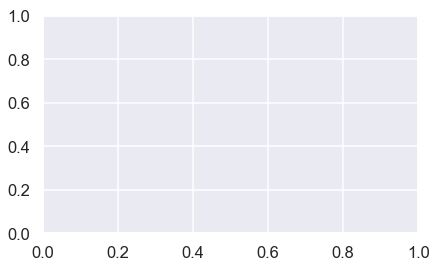

In [19]:
### make your plot here
# BEGIN SOLUTION
early_trump = trump[trump['year'] < 2017]
top_devices = early_trump['source'].value_counts().head(2).index
for device in top_devices:
    sns.distplot(early_trump[early_trump['source'] == device]['hour'], label = device[12:], hist=False)
plt.title('Distribution of Tweet Hours for Different Tweet Sources (pre-2017)')
plt.xlabel('hour')
plt.ylabel('fraction')
plt.legend();
# plt.savefig('images/device_hour4c.png', bbox_inches='tight', dpi=300)
# END SOLUTION

### Question 4d

During the campaign, it was theorized that Donald Trump's tweets from Android devices were written by him personally, and the tweets from iPhones were from his staff. Does your figure give support to this theory? What kinds of additional analysis could help support or reject this claim?

<!--
BEGIN QUESTION
name: q4d
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

**SOLUTION:** Yes, our figure shows that the Android tweets started earlier in the morning when Donald Trump is known to tweet, and when paid staff are unlikely to be posting.

---
# Part 3: Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

#### The creators of VADER describe the tool’s assessment of polarity, or “compound score,” in the following way:

“The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.”

As you can see, VADER doesn't "read" sentences, but works by parsing sentences into words assigning a preset generalized score from their testing sets to each word separately. 

VADER relies on humans to stabilize its scoring. The creators use Amazon Mechanical Turk, a crowdsourcing survey platform, to train its model. Its training set of data consists of a small corpus of tweets, New York Times editorials and news articles, Rotten Tomatoes reviews, and Amazon product reviews, tokenized using the natural language toolkit (NLTK). Each word in each dataset was reviewed and rated by at least 20 trained individuals who had signed up to work on these tasks through Mechanical Turk. 

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [19]:
print(''.join(open("vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



## Question 5

As you can see, the lexicon contains emojis too! Each row contains a word and the *polarity* of that word, measuring how positive or negative the word is.

(How did they decide the polarities of these words? What are the other two columns in the lexicon? See the link above.)

### Question 5a

Read in the lexicon into a DataFrame called `sent`. The index of the DataFrame should be the words in the lexicon. `sent` should have one column named `polarity`, storing the polarity of each word.

* **Hint:** The `pd.read_csv` function may help here. 

<!--
BEGIN QUESTION
name: q5a
points: 1
-->

In [20]:
sent = ...
# BEGIN SOLUTION NO PROMPT
sent = pd.read_csv('vader_lexicon.txt', sep='\t',
                   usecols=[0, 1], header=None, names=['token', 'polarity'],
                   index_col='token')
# END SOLUTION
sent.head()

,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [ ]:
ok.grade("q5a");

### Question 5b

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `trump` DataFrame to be the lowercased text of each tweet.

<!--
BEGIN QUESTION
name: q5b
points: 1
-->

In [21]:
# BEGIN SOLUTION
trump['text'] = trump['text'].str.lower()
# END SOLUTION
trump.head()

,time,source,text,retweet_count,year,hour
690171032150237184,2016-01-21 13:56:11+00:00,Twitter for Android,"""@bigop1: @realdonaldtrump @sarahpalinusa https://t.co/3kyqgqevyd""",1059,2016.054645,Ellipsis
690171403388104704,2016-01-21 13:57:39+00:00,Twitter for Android,"""@americanaspie: @glennbeck @sarahpalinusa remember when glenn gave out gifts to illegal aliens at crossing the border? me too!""",1339,2016.054645,Ellipsis
690173226341691392,2016-01-21 14:04:54+00:00,Twitter for Android,so sad that @cnn and many others refused to show the massive crowd at the arena yesterday in oklahoma. dishonest reporting!,2006,2016.054645,Ellipsis
690176882055114758,2016-01-21 14:19:26+00:00,Twitter for Android,"sad sack @jebbush has just done another ad on me, with special interest money, saying i won't beat hillary - i will. but he can't beat me.",2266,2016.054645,Ellipsis
690180284189310976,2016-01-21 14:32:57+00:00,Twitter for Android,low energy candidate @jebbush has wasted $80 million on his failed presidential campaign. millions spent on me. he should go home and relax!,2886,2016.054645,Ellipsis


In [22]:
ok.grade("q5b");

NameError: name 'ok' is not defined

### Question 5c

Now, let's get rid of punctuation since it will cause us to fail to match words. Create a new column called `no_punc` in the `trump` DataFrame to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be *any character that isn't a Unicode word character or a whitespace character*. You may want to consult the Python documentation on regexes for this problem.

(Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.)

<!--
BEGIN QUESTION
name: q5c
points: 1
-->

In [23]:
# Save your regex in punct_re
punct_re = r''
trump['no_punc'] = ...
# BEGIN SOLUTION NO PROMPT
punct_re = r'[^\w\s]'
trump['no_punc'] = trump['text'].str.replace(punct_re, ' ')
# END SOLUTION

In [ ]:
ok.grade("q5c");

### Question 5d

Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

**Note that your DataFrame may look different from the one above.** However, you can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the `trump` DataFrame, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

<!--
BEGIN QUESTION
name: q5d
points: 2
-->

In [24]:
tidy_format = ...
# BEGIN SOLUTION NO PROMPT
tidy_format = (
    trump['no_punc']
    .str.split(expand=True)
    .stack()
    .reset_index(level=1)
    .rename(columns={'level_1': 'num', 0: 'word'})
)
tidy_format.head()
# END SOLUTION

,num,word
690171032150237184,0,bigop1
690171032150237184,1,realdonaldtrump
690171032150237184,2,sarahpalinusa
690171032150237184,3,https
690171032150237184,4,t


In [ ]:
ok.grade("q5d");

### Question 5e

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hints:** 
* You will need to merge the `tidy_format` and `sent` tables and group the final answer.
* If certain words are not found in the `sent` table, set their polarities to 0.

<!--
BEGIN QUESTION
name: q5e
points: 2
-->

In [25]:
trump['polarity'] = ...
# BEGIN SOLUTION NO PROMPT
trump['polarity'] = (
    tidy_format
    .merge(sent, how='left', left_on='word', right_index=True)
    .reset_index()
    .loc[:, ['index', 'polarity']]
    .groupby('index')
    .sum()
    .fillna(0)
)
trump[['text', 'polarity']].head()
# END SOLUTION

,text,polarity
690171032150237184,"""@bigop1: @realdonaldtrump @sarahpalinusa https://t.co/3kyqgqevyd""",0.0
690171403388104704,"""@americanaspie: @glennbeck @sarahpalinusa remember when glenn gave out gifts to illegal aliens at crossing the border? me too!""",-2.6
690173226341691392,so sad that @cnn and many others refused to show the massive crowd at the arena yesterday in oklahoma. dishonest reporting!,-6.0
690176882055114758,"sad sack @jebbush has just done another ad on me, with special interest money, saying i won't beat hillary - i will. but he can't beat me.",4.3
690180284189310976,low energy candidate @jebbush has wasted $80 million on his failed presidential campaign. millions spent on me. he should go home and relax!,-2.6


In [ ]:
ok.grade("q5e");

Now we have a measure of the sentiment of each of his tweets! Note that this calculation is rather basic; you can read over the VADER readme to understand a more robust sentiment analysis.

Now, run the cells below to see the most positive and most negative tweets from Trump in your dataset:

In [58]:
print('Most negative tweets:')
for t in trump.sort_values('polarity').head()['text']:
    print('\n  ', t)

In [59]:
print('Most positive tweets:')
for t in trump.sort_values('polarity', ascending=False).head()['text']:
    print('\n  ', t)

### Question 5Ea:
Given the above information about how VADER works, what do you think about using VADER as a tool? Give one advantage and one disadvantage of using this tool.  

Are there circumstances (e.g. certain kinds of language or data) when you might not want to use VADER? Please answer "Yes," or "No," and provide 1 reason for your answer. 


### Question 5Eb:

Consider the idea of aggregation and scale in this context. VADER aggregates the user-generated scores, aggregates the sentiment of words in order to determine the overall sentiment of a  sentence, and further aggregates sentences to assign just one aggregated score to a whole tweet or collection of tweets. 

In 3-4 sentences, please answer the following: 1) What are the potential gains of this aggregation method? 2) What could get lost in these instances of aggregation? 3) In your opinion, what are the dangers in ignoring these losses for the sake of scale, if any? 



### Question 5Ec:

Now consider specifically the contexts and consequences of using VADER on the President's tweets.  

What kind of information could this aggregate polarity score provide? What might this score leave out that you would consider important? Answer in 2-3 sentences.

### Question 5Ed:

Identify and read the 5 most positive and 5 most negative tweets. Do you think these tweets are accurately represented by their polarity scores? Do you see any pattern in the kinds of things you think the polarity score gets right or wrong?  



## Question 6

Now, let's try looking at the distributions of sentiments for tweets containing certain keywords.

### Question 6a

In the cell below, create a single plot showing both the distribution of tweet sentiments for tweets containing `nytimes`, as well as the distribution of tweet sentiments for tweets containing `fox`.

<!--
BEGIN QUESTION
name: q6a
points: 1
manual: true
-->
<!-- EXPORT TO PDF -->

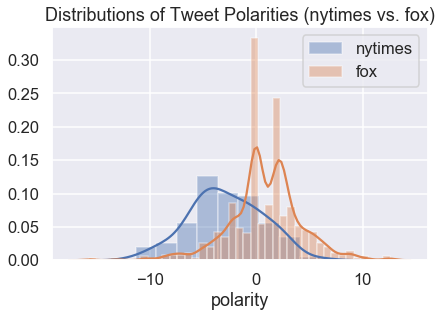

In [26]:
# BEGIN SOLUTION
sns.distplot(trump[trump['text'].str.lower().str.contains("nytimes")]['polarity'],label = 'nytimes')
sns.distplot(trump[trump['text'].str.lower().str.contains("fox")]['polarity'],label = 'fox')
plt.title('Distributions of Tweet Polarities (nytimes vs. fox)')
plt.legend();
# plt.savefig("images/nytimes_vs_fox6a.png", bbox_inches='tight', dpi=300)
# END SOLUTION

### Question 6b
Comment on what you observe in the plot above. Can you find other pairs of keywords that lead to interesting plots? (If you modify your code in 6a, remember to change the words back to `nytimes` and `fox` before submitting for grading).

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

**SOLUTION:** We notice that the president appears to say more positive things about Fox than the New York Times.

### Question 6cE:
Do you feel like this form of representing President Trump’s tweets offers something different than simply reading through his tweets would? Please answer "Yes" or "No" and explain your reasoning in 1-2 sentences.

*Solution* 


### Question 6dE: 
Please answer one of the following:
Were you surprised by any of the representations you made? Why?
If you were familiar with the President and his tweets before, did these representations give you any new insights? Explain your reasoning.
Respond in 1-2 sentences.

*Solution*


### Question 6eE:

Sentiment analysis is frequently used to reduce the complexity of text in order to reveal more general  patterns in a given textual corpus. We can generalize this technique to the practice of data science, where dimensionality reduction is an essential part of the practice of gaining insight into large datasets. 

What other ways could one represent these tweets visually and compare them? Choose one method that comes to mind and explain: in what ways would that method derive meaning differently than how you’ve done it in this Homework? Or, what are some trade-offs that occur when one reduces the complexity of a tweet?

(Hint if you are drawing a blank: Consider work you have done previously in this course with visualizations of frequency or distribution.)

##### *Example Responses:*

Visualizing the frequency of the top 20 words used could give a different view of the tweets than sentiment analysis. This view leaves the reader with the job of interpreting more of the meaning of the words, as they are not assigned a general value. But, this visualization might also produce results that are not immediately interpretable at all (e.g. the top words might not be reflective of any generalizable meaning or content).

We could use regex expressions to pull out a word or series of words that reflects a topic, and count the number of tweets that contain this word. This would give us more granularity about what the tweets are referring to, and would make any subsequent analysis potentially more precise.


# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 5 EXPORTED QUESTIONS -->

In [ ]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('hw3.ipynb', 'hw3.pdf')
ok.submit()